# Importation

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [28]:
paths = pd.read_csv('paths_europe.csv')
missions = pd.read_csv('missions_europe.csv')
paths.head()

,ville1,ville2,longueur,couleur,specialType
0,edinburgh,london,4,black,NaN
1,edinburgh,london,4,orange,NaN
2,amsterdam,london,2,grey,2 loco
3,dieppe,london,2,grey,1 loco
4,dieppe,london,2,grey,1 loco


In [29]:
missions.head()

,city1,city2,points
0,budapest,sofia,5
1,frankfurt,kobenhavn,5
2,erzurum,rostov,5
3,sofia,smyrna,5
4,athina,angora,5


In [35]:
print(sum(paths.duplicated()))
print(sum(missions.duplicated()))
paths[paths.duplicated()] #C'est normal

2
0


,ville1,ville2,longueur,couleur,specialType
4,dieppe,london,2,grey,1 loco
44,kobenhavn,essen,3,grey,1 loco


In [36]:
nb_cities = len(set(list(paths['ville1'])+list(paths['ville2'])))
nb_roads = len(paths)

print(f'number of cities : {nb_cities}')
print(f'number of paths : {nb_roads}')

number of cities : 47
number of paths : 101


Nb path per length :  {2: 35, 3: 30, 4: 29, 1: 4, 6: 2, 8: 1}
Nb paths per color :  {'grey': 37, 'black': 8, 'orange': 8, 'yellow': 8, 'green': 8, 'pink': 8, 'blue': 8, 'white': 8, 'red': 8}


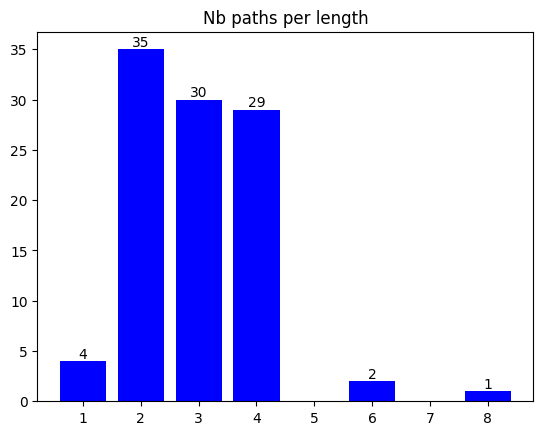

In [62]:
nb_path_per_length = dict(paths['longueur'].value_counts())
print("Nb path per length : ",nb_path_per_length)
nb_paths_per_color = dict(paths['couleur'].value_counts())
bars = plt.bar(nb_path_per_length.keys(), nb_path_per_length.values(), color='blue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.title('Nb paths per length')
plt.show()

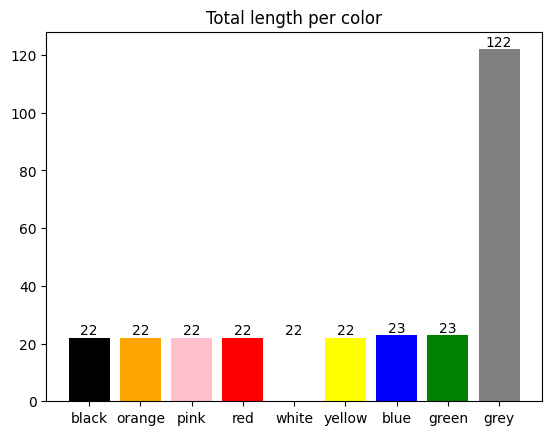

In [84]:
sum_lengths_by_color = paths.groupby('couleur')['longueur'].sum().sort_values()
bars = plt.bar(sum_lengths_by_color.index, sum_lengths_by_color.values, color=sum_lengths_by_color.index)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.title('Total length per color')
plt.show()

Nodes of the graph:  ['edinburgh', 'london', 'amsterdam', 'dieppe', 'essen', 'bruxelles', 'paris', 'brest', 'pamplona', 'marseille', 'zurich', 'frankfurt', 'madrid', 'barcelona', 'lisboa', 'cadiz', 'venezia', 'munchen', 'roma', 'brindisi', 'palermo', 'berlin', 'kobenhavn', 'stockholm', 'petrograd', 'moskva', 'riga', 'wilno', 'warszawa', 'kyiv', 'smolensk', 'kharkov', 'bucuresti', 'budapest', 'wien', 'danzic', 'zagrab', 'sarajevo', 'sevastopol', 'constantinople', 'sofia', 'athina', 'smyrna', 'angora', 'sochi', 'rostov', 'erzurum']
Edges of the graph:  [('edinburgh', 'london', {'weight': 4, 'edge_color': 'orange'}), ('london', 'amsterdam', {'weight': 2, 'edge_color': 'grey'}), ('london', 'dieppe', {'weight': 2, 'edge_color': 'grey'}), ('amsterdam', 'essen', {'weight': 3, 'edge_color': 'yellow'}), ('amsterdam', 'bruxelles', {'weight': 1, 'edge_color': 'black'}), ('amsterdam', 'frankfurt', {'weight': 2, 'edge_color': 'white'}), ('dieppe', 'bruxelles', {'weight': 2, 'edge_color': 'green'}),

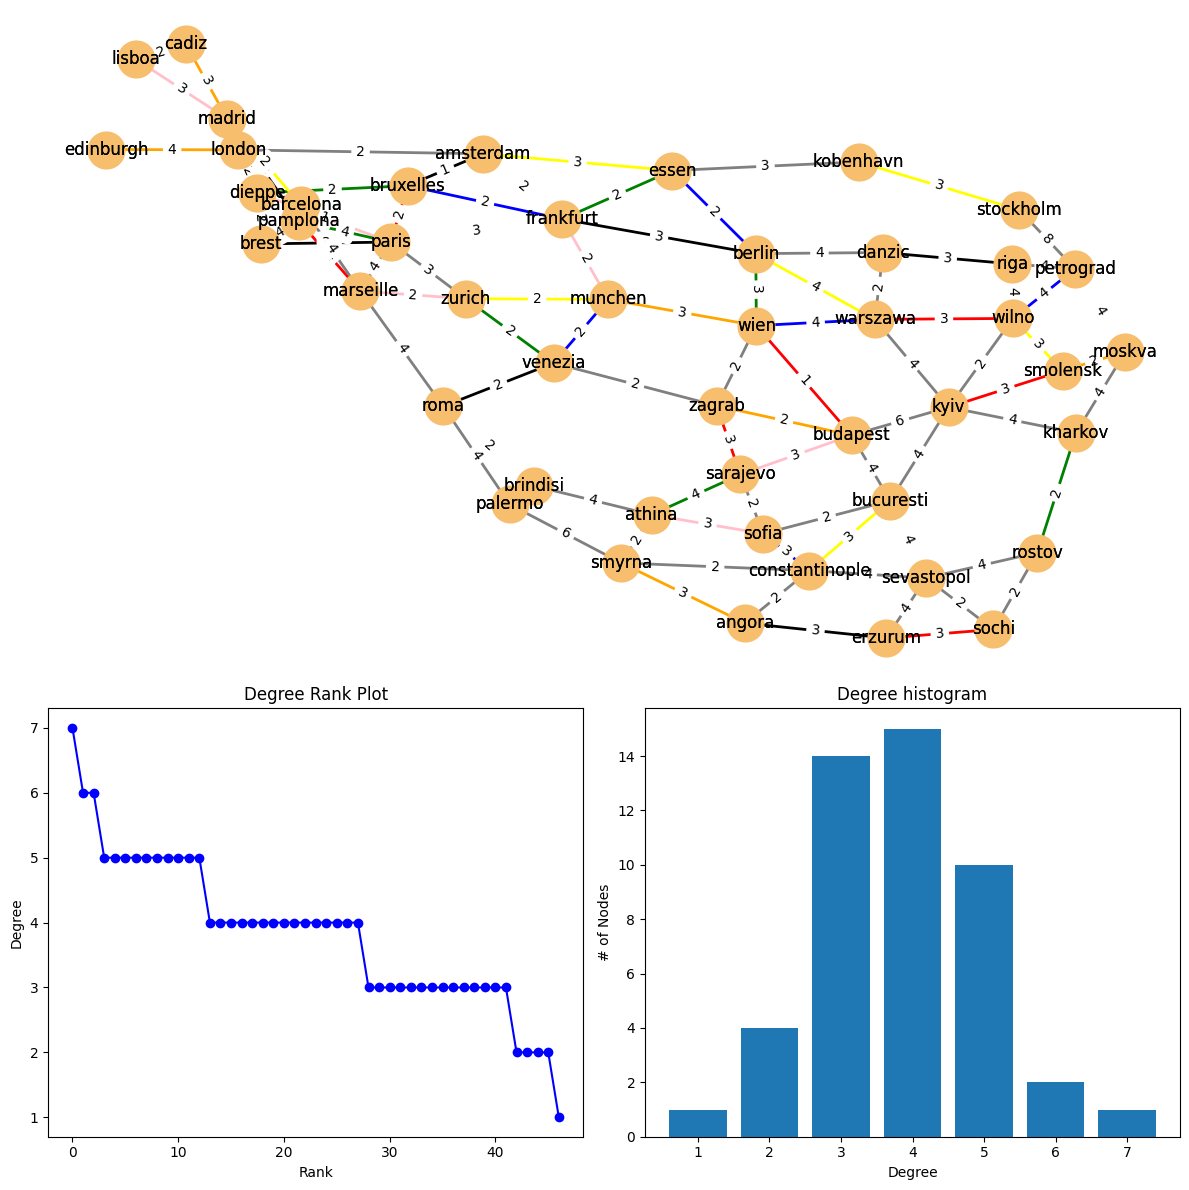

In [82]:
G = nx.Graph()

# Ajouter des arêtes à partir du DataFrame
for index, row in paths.iterrows():
    G.add_edge(row['ville1'], row['ville2'], weight=row['longueur'], edge_color = row['couleur'])

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
# Vérifier la création du graphe
print("Nodes of the graph: ", G.nodes())
print("Edges of the graph: ", G.edges(data=True))
fig = plt.figure(figsize=(12, 12))
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])

pos = nx.spring_layout(G, seed=63)
edges = G.edges(data=True)
nx.draw_networkx_nodes(G, pos, ax=ax0, node_size=700, node_color='#F7BE6D')
nx.draw_networkx_labels(G, pos, ax=ax0)
# Dessiner les étiquettes des noeuds
nx.draw_networkx_labels(G, pos, font_size=12)

# Dessiner les arêtes avec les couleurs correspondantes
for edge in edges:
    nx.draw_networkx_edges(G, pos, ax=ax0, edgelist=[(edge[0], edge[1])], width=2, edge_color=edge[2]['edge_color'])
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, ax=ax0, edge_labels=edge_labels)
# Afficher le graphe
ax0.set_axis_off()  # Ne pas afficher les axes pour un rendu plus propre
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()  # Afficher le graphe